In [1]:
#Gọi thư viện:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#--------
from warnings import simplefilter
from sklearn.datasets import  make_classification
#Đọc tập dữ liệu 
data= pd.read_csv('Data_Diabetes.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               723 non-null    int64  
 1   Glucose                   723 non-null    int64  
 2   BloodPressure             723 non-null    int64  
 3   SkinThickness             723 non-null    float64
 4   Insulin                   723 non-null    float64
 5   BMI                       723 non-null    float64
 6   DiabetesPedigreeFunction  723 non-null    float64
 7   Age                       723 non-null    int64  
 8   Outcome                   723 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 51.0 KB


In [2]:
#hiển thị 5 dòng dữ liệu đầu tiên

data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,126.0,33.6,0.627,50,1
1,1,85,66,29.0,126.0,26.6,0.351,31,0
2,8,183,64,29.0,126.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1


In [3]:
#hiển thị 5 dòng dữ liệu cuối cùng

data.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
718,10,101,76,48.0,180.0,32.9,0.171,63,0
719,2,122,70,27.0,126.0,36.8,0.340,27,0
720,5,121,72,23.0,112.0,26.2,0.245,30,0
721,1,126,60,29.0,126.0,30.1,0.349,47,1
722,1,93,70,31.0,126.0,30.4,0.315,23,0


In [4]:
#Lấy ngẫu nhiên 5 hồ sơ bệnh án:

data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
398,0,102,64,46.0,78.0,40.6,0.496,21,0
144,1,153,82,42.0,485.0,40.6,0.687,23,0
501,0,105,90,29.0,126.0,29.6,0.197,46,0
366,1,100,66,29.0,196.0,32.0,0.444,42,0
587,0,132,78,29.0,126.0,32.4,0.393,21,0


In [5]:
#khám phá tập dữ liệu 
#1. Quan sát Các thuộc tính số

data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,3.869986,121.928077,72.467497,29.147994,142.435685,32.473582,0.474649,33.367911,0.344398
std,3.363438,30.746940,12.256605,9.017616,88.624795,6.891518,0.332530,11.764549,0.475501
min,0.000000,44.000000,30.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,119.500000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,126.000000,32.400000,0.378000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,131.000000,36.600000,0.628000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


0    474
1    249
Name: Outcome, dtype: int64


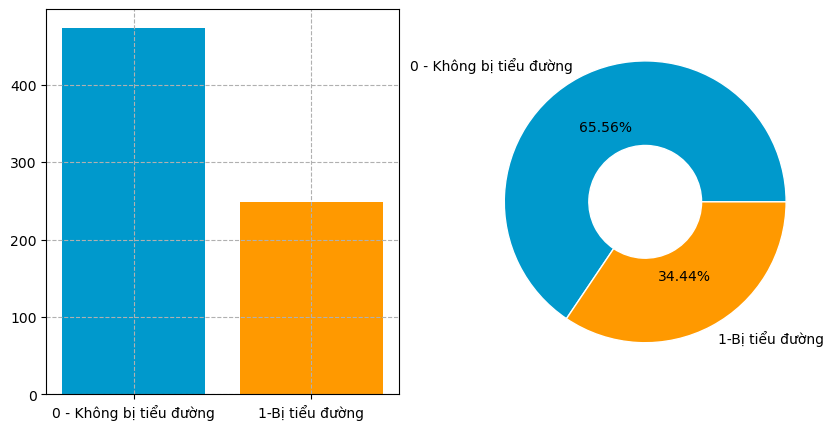

In [6]:
#Thống kê số lượng bệnh nhân bị bệnh và không bị bệnh (Đánh giá mức độ cân bằng dữ liệu)
kq = data['Outcome'].value_counts()
lb = ['0 - Không bị tiểu đường','1-Bị tiểu đường']
print(kq)
#----------------------------------------------
#trực quan hóa số liệu
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

#Vẽ biểu đồ cột thể hiện số lượng hồ sơ bị bệnh - không bị bệnh
plt.subplot(1,2,1) 
plt.bar(lb,kq.values, color=['#0099CC','#FF9900'])
plt.grid(ls='--')

#Vẽ biểu đồ tròn thể hiện tỷ lệ % hồ sơ bị bệnh - ko bị bệnh
plt.subplot(1,2,2)
plt.pie(kq.values, labels=lb, colors=['#0099CC','#FF9900'],
        autopct='%.2f%%', wedgeprops=dict(width=0.6,edgecolor='w'))

plt.show()

**Nhận xét**
- tập dữ liệu ở trạng thái mất cân bằng dữ liệu nhẹ 
       
       + không bị tiểu đường chiếm 65,56%
       + bị tiểu đường chiếm 34,44%

In [7]:
import imblearn
print('phiên bản thư viện:',imblearn.__version__)

phiên bản thư viện: 0.12.2


**2. Xử lý cân bằng dữ liệu**

In [8]:
# Lấy giá trị biến độc lập: X
X = data.loc[:,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                      'Insulin','BMI', 'DiabetesPedigreeFunction','Age']].values

print('Kích thước biến độc lập X:',X.shape)
print(X)

Kích thước biến độc lập X: (723, 8)
[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [9]:
#Lấy giá trị biến phụ thuộc: y
y=data.loc[:,'Outcome'].values

print('Kích thước biến phụ thuộc Y:',y.shape)
print(y)

Kích thước biến phụ thuộc Y: (723,)
[1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0
 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0
 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0
 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1
 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0
 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0

In [10]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# sử dụng phương pháp SMOTE để sinh thêm mẫu trong lớp thiếu số theo tỷ lệ : 0.6:1
# sử dụng phương pháp Random Under Sampling để loại bỏ ngẫu nhiên số mẫu trong lớp đa số theo tỷ lệ :0.8:1
over = SMOTE(sampling_strategy=0.6)
under = RandomUnderSampler(sampling_strategy=0.8)
steps =[('over',over),
       ('under',under)]
pipeline = Pipeline(steps=steps)

In [11]:
X1, y1 = pipeline.fit_resample(X, y)


counter1 = Counter(y1)
print(counter1)

Counter({0: 355, 1: 284})


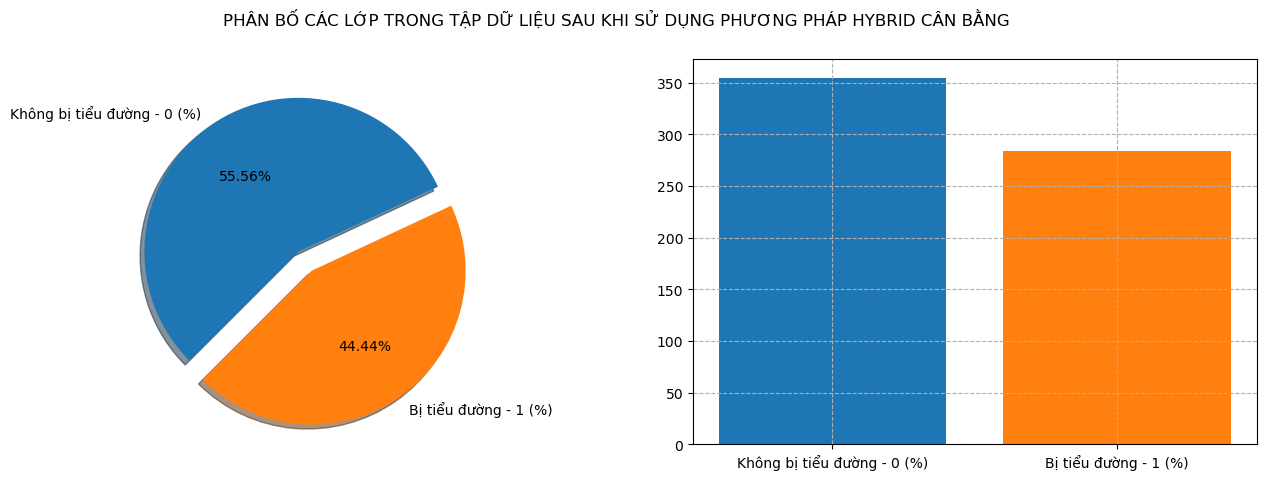

In [12]:
class_y = list(counter1.values())
labels = 'Không bị tiểu đường - 0 (%)', 'Bị tiểu đường - 1 (%)'

plt.figure(figsize=(16,5))

# vẽ biểu đồ tròn
plt.subplot(1,2,1)
plt.pie(class_y, explode=[0,0.15], autopct='%1.2f%%', shadow=True,
        labels=labels, startangle=25, colors=['#1E77B4','#FF7F0F'])

#vẽ biểu đồ cột
plt.subplot(1,2,2)
plt.bar(labels, class_y,color=['#1E77B4', '#FF7F0F'])
plt.grid(ls='--')
plt.suptitle('PHÂN BỐ CÁC LỚP TRONG TẬP DỮ LIỆU SAU KHI SỬ DỤNG PHƯƠNG PHÁP HYBRID CÂN BẰNG', fontsize =12)
plt.show()

**Nhận xét:**
- Sau khi sử dụng phương pháp Hybrid thì tập dữ liệu đã ở dạng cân bằng dữ liệu
        
        + Không bị tiểu đường chiếm : 55,56%
        + Bị tiểu đường chiếm: 44,44%

**3. Phân tách các biến độc lập (X)-  Phụ thuộc (Y) tương ứng**

In [13]:
#Kiểm tra dữ liệu thiếu trong Dataset

data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
# Lấy giá trị biến độc lập: X
X = data.loc[:,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                      'Insulin','BMI', 'DiabetesPedigreeFunction','Age']].values

print('Kích thước biến độc lập X:',X.shape)
print(X)

Kích thước biến độc lập X: (723, 8)
[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [15]:
#Lấy giá trị biến phụ thuộc: y
y=data.loc[:,'Outcome'].values

print('Kích thước biến phụ thuộc Y:',y.shape)
print(y)

Kích thước biến phụ thuộc Y: (723,)
[1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0
 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0
 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0
 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1
 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0
 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0

**4. Chia tập dữ liệu thành 2 phần train-test**

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, #Biến độc lập X tách thành (X_train; X_Test)
                                                    y, #Biến phụ thuộc y tách thành (Y_train; Y_test)
                                                    train_size=0.7, #Tỷ lệ tách: train = 0.7 (70%)
                                                    shuffle=True)   #Lấy các mẫu ngẫu nghiên 
print('1.Kích thước tập Training:', X_train.shape)
print('2.Kích thước tập Test:', X_test.shape)


1.Kích thước tập Training: (506, 8)
2.Kích thước tập Test: (217, 8)


In [17]:
#Dữ liệu X_train
print('Kích thước biến độc lập X_train:',X_train.shape)
print(X_train)

Kích thước biến độc lập X_train: (506, 8)
[[0.000e+00 1.370e+02 7.000e+01 ... 3.320e+01 1.700e-01 2.200e+01]
 [5.000e+00 7.800e+01 4.800e+01 ... 3.370e+01 6.540e-01 2.500e+01]
 [7.000e+00 1.600e+02 5.400e+01 ... 3.050e+01 5.880e-01 3.900e+01]
 ...
 [2.000e+00 8.700e+01 5.800e+01 ... 3.270e+01 1.660e-01 2.500e+01]
 [4.000e+00 1.250e+02 7.000e+01 ... 2.890e+01 1.144e+00 4.500e+01]
 [1.000e+00 1.110e+02 8.600e+01 ... 3.010e+01 1.430e-01 2.300e+01]]


In [18]:
#Dữ liệu y_train
print('Kích thước biến phụ thuộc y_train:',Y_train.shape)
print(Y_train)

Kích thước biến phụ thuộc y_train: (506,)
[0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1
 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1

**5. Lựa chọn Mô hình huấn luyện model**
- Lựa chọn mô hình KNN

In [19]:
#Gọi thư viện sklearn với thuật toán phân lớp KNN
from sklearn.neighbors import KNeighborsClassifier

#Khai báo model KNN sử dụng các tham số mặc định
KNN_tieuduong = KNeighborsClassifier(n_neighbors = 5)

#Hiển thị danh sách tham số: Model.get_params()  
KNN_tieuduong.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [20]:
#Thực hiện huấn luyện với dữ liệu tập train: Model.fit(X_train,y_train)
KNN_tieuduong.fit(X_train, Y_train)





KNeighborsClassifier()

In [21]:
#Độ chính xác của Model trên tập Huấn luyện: Model.score(X_train,y_train)
train = KNN_tieuduong.score(X_train,Y_train)
print('Độ chính xác trên tập huấn luyện: ', train)
print('Độ chính xác trên tập huấn luyện: ', round(train*100,2))

Độ chính xác trên tập huấn luyện:  0.766798418972332
Độ chính xác trên tập huấn luyện:  76.68


In [22]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test: Model.predict(X_test)
y_pred = KNN_tieuduong.predict(X_test)

In [23]:
#Kết quả dự đoán của mô hình trên tập test:
print(y_pred)
print(y_pred.shape)


[0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0
 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1
 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1]
(217,)


In [24]:
#So sánh kết quả dự đoán với kết quả thật với 20 bệnh nhân đầu tiên:
print('thật',Y_test[:20])
print('đoán',y_pred[:20])


thật [0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0]
đoán [0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0]


In [25]:
#Import module accuracy_score trong thư viện sklearn.metrics để đánh giá độ chính xác:
from sklearn.metrics import accuracy_score

#1. Đếm tổng số mẫu dự đoán đúng trên tập Test: normalize=False
test1 = accuracy_score(Y_test, y_pred, normalize = False)

print('Tổng số mẫu dự đoán đúng:' , test1,'/',len(Y_test))

Tổng số mẫu dự đoán đúng: 165 / 217


In [26]:
161/217

0.7419354838709677

In [27]:
#2.Độ chính xác (Accuracy) theo tỷ lệ % 
#(số mẫu dự đoán đúng/tổng số mẫu của tập test): normalize=True
acc_test2 = accuracy_score(Y_test, y_pred, normalize = True)

print('Độ chính xác của mô hình trên tập Test' , acc_test2)
print('Độ chính xác của mô hình trên tập Test' , round(acc_test2*100,2))

Độ chính xác của mô hình trên tập Test 0.7603686635944701
Độ chính xác của mô hình trên tập Test 76.04


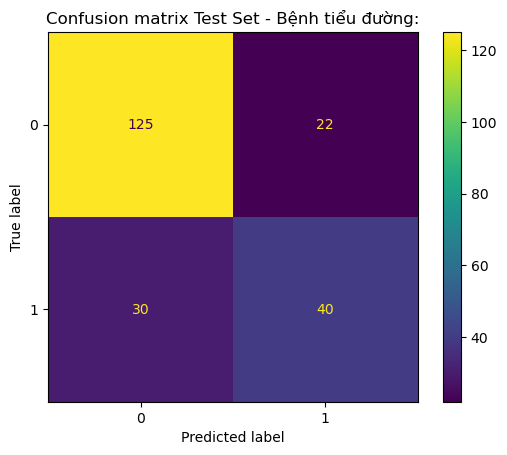

In [28]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 
#Tính ma trận confusion matrix:
cnf_matrix_benhtieuduong = confusion_matrix(Y_test,y_pred)

#Hiển thị ma trận:
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
plt.title('Confusion matrix Test Set - Bệnh tiểu đường:')
plt.show()

**6. Tính toán thông số F1-Score, Recall**

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [30]:
#y_hat = KNN_tieuduong.predict(X_test)
#y_pred = np.argmax(y_hat, axis=1)
#y_test_label = np.argmax(Y_test, axis=1 )

#tính recall:tp /(tp+fn)
recall = recall_score(Y_test, y_pred)
print('Recall: %f', recall)

#tính f1: 2 tp / ( 2 tp + fp + fn)
f1 = f1_score(Y_test, y_pred)
print('F1 score: %f', f1)



Recall: %f 0.5714285714285714
F1 score: %f 0.606060606060606


**7. Sử dụng model**

In [31]:
Pregnancies = 0
Glucose = 128
BloodPressure = 78
SkinThickness = 30
Insulin = 138
BMI = 30
DiabetesPedigreeFunction = 1.18
Age = 23


nguoi1= np.array([[0, 128, 78, 30, 138, 30, 1.18, 23]])
print(nguoi1)

[[  0.   128.    78.    30.   138.    30.     1.18  23.  ]]


In [32]:
#Sử dụng mô hình để dự đoán cho bệnh nhân 1:

y_pred_1 = KNN_tieuduong.predict(nguoi1)

if(y_pred_1==0):
    print('bạn không bị tiểu đường')
else:
    print("bạn dã bị tiểu đường")

bạn không bị tiểu đường


In [33]:
#4. xây dựng model dự đoán bệnh nân bị u vú lành tính - ác tính với thuật toán cây quyết định 

# Gọi thư viện thuật toán DecisionTreeClasifier
from sklearn.tree import DecisionTreeClassifier

# Khai báo mô hình
Tree_td = DecisionTreeClassifier()

# Liệt kê danh sách tham số:
Tree_td.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [34]:
#Huấn luyện:
Tree_td.fit(X_train, Y_train)

DecisionTreeClassifier()

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
[0.03205332 0.26227559 0.11547356 0.03950309 0.0224047  0.18034777
 0.17389736 0.1740446 ]


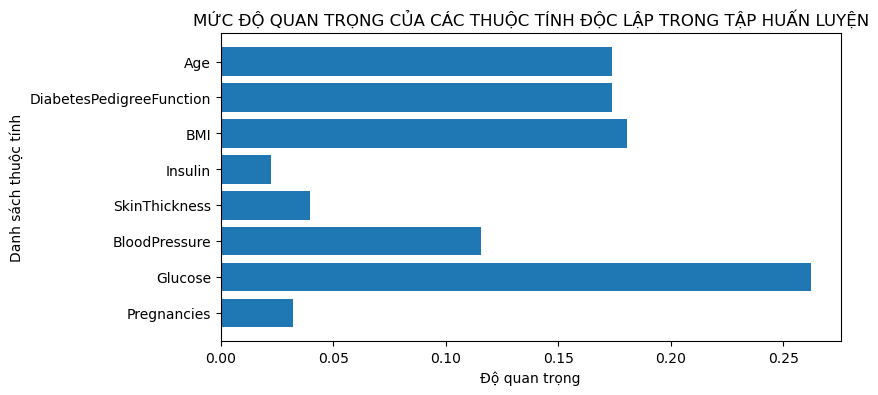

In [35]:
#a. xác định và trực quan hoá độ quan trọng của các thuộc tính độc lập trong tập huấn luyện

# Đặt tên cho các thuộc tính và target
feature_names = ['Pregnancies',
                'Glucose',
                'BloodPressure',
                'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
td_names = ['0: không bị tiểu đường', '1: tiểu đường']

print(feature_names)
print(Tree_td.feature_importances_)

# Trực quan hóa độ quan trọng của các thuộc tính độc lập trong tập huấn luyện
plt.figure(figsize=(8,4))
plt.barh(feature_names, Tree_td.feature_importances_)

plt.title('MỨC ĐỘ QUAN TRỌNG CỦA CÁC THUỘC TÍNH ĐỘC LẬP TRONG TẬP HUẤN LUYỆN')
plt.ylabel('Danh sách thuộc tính')
plt.xlabel('Độ quan trọng')
plt.show()

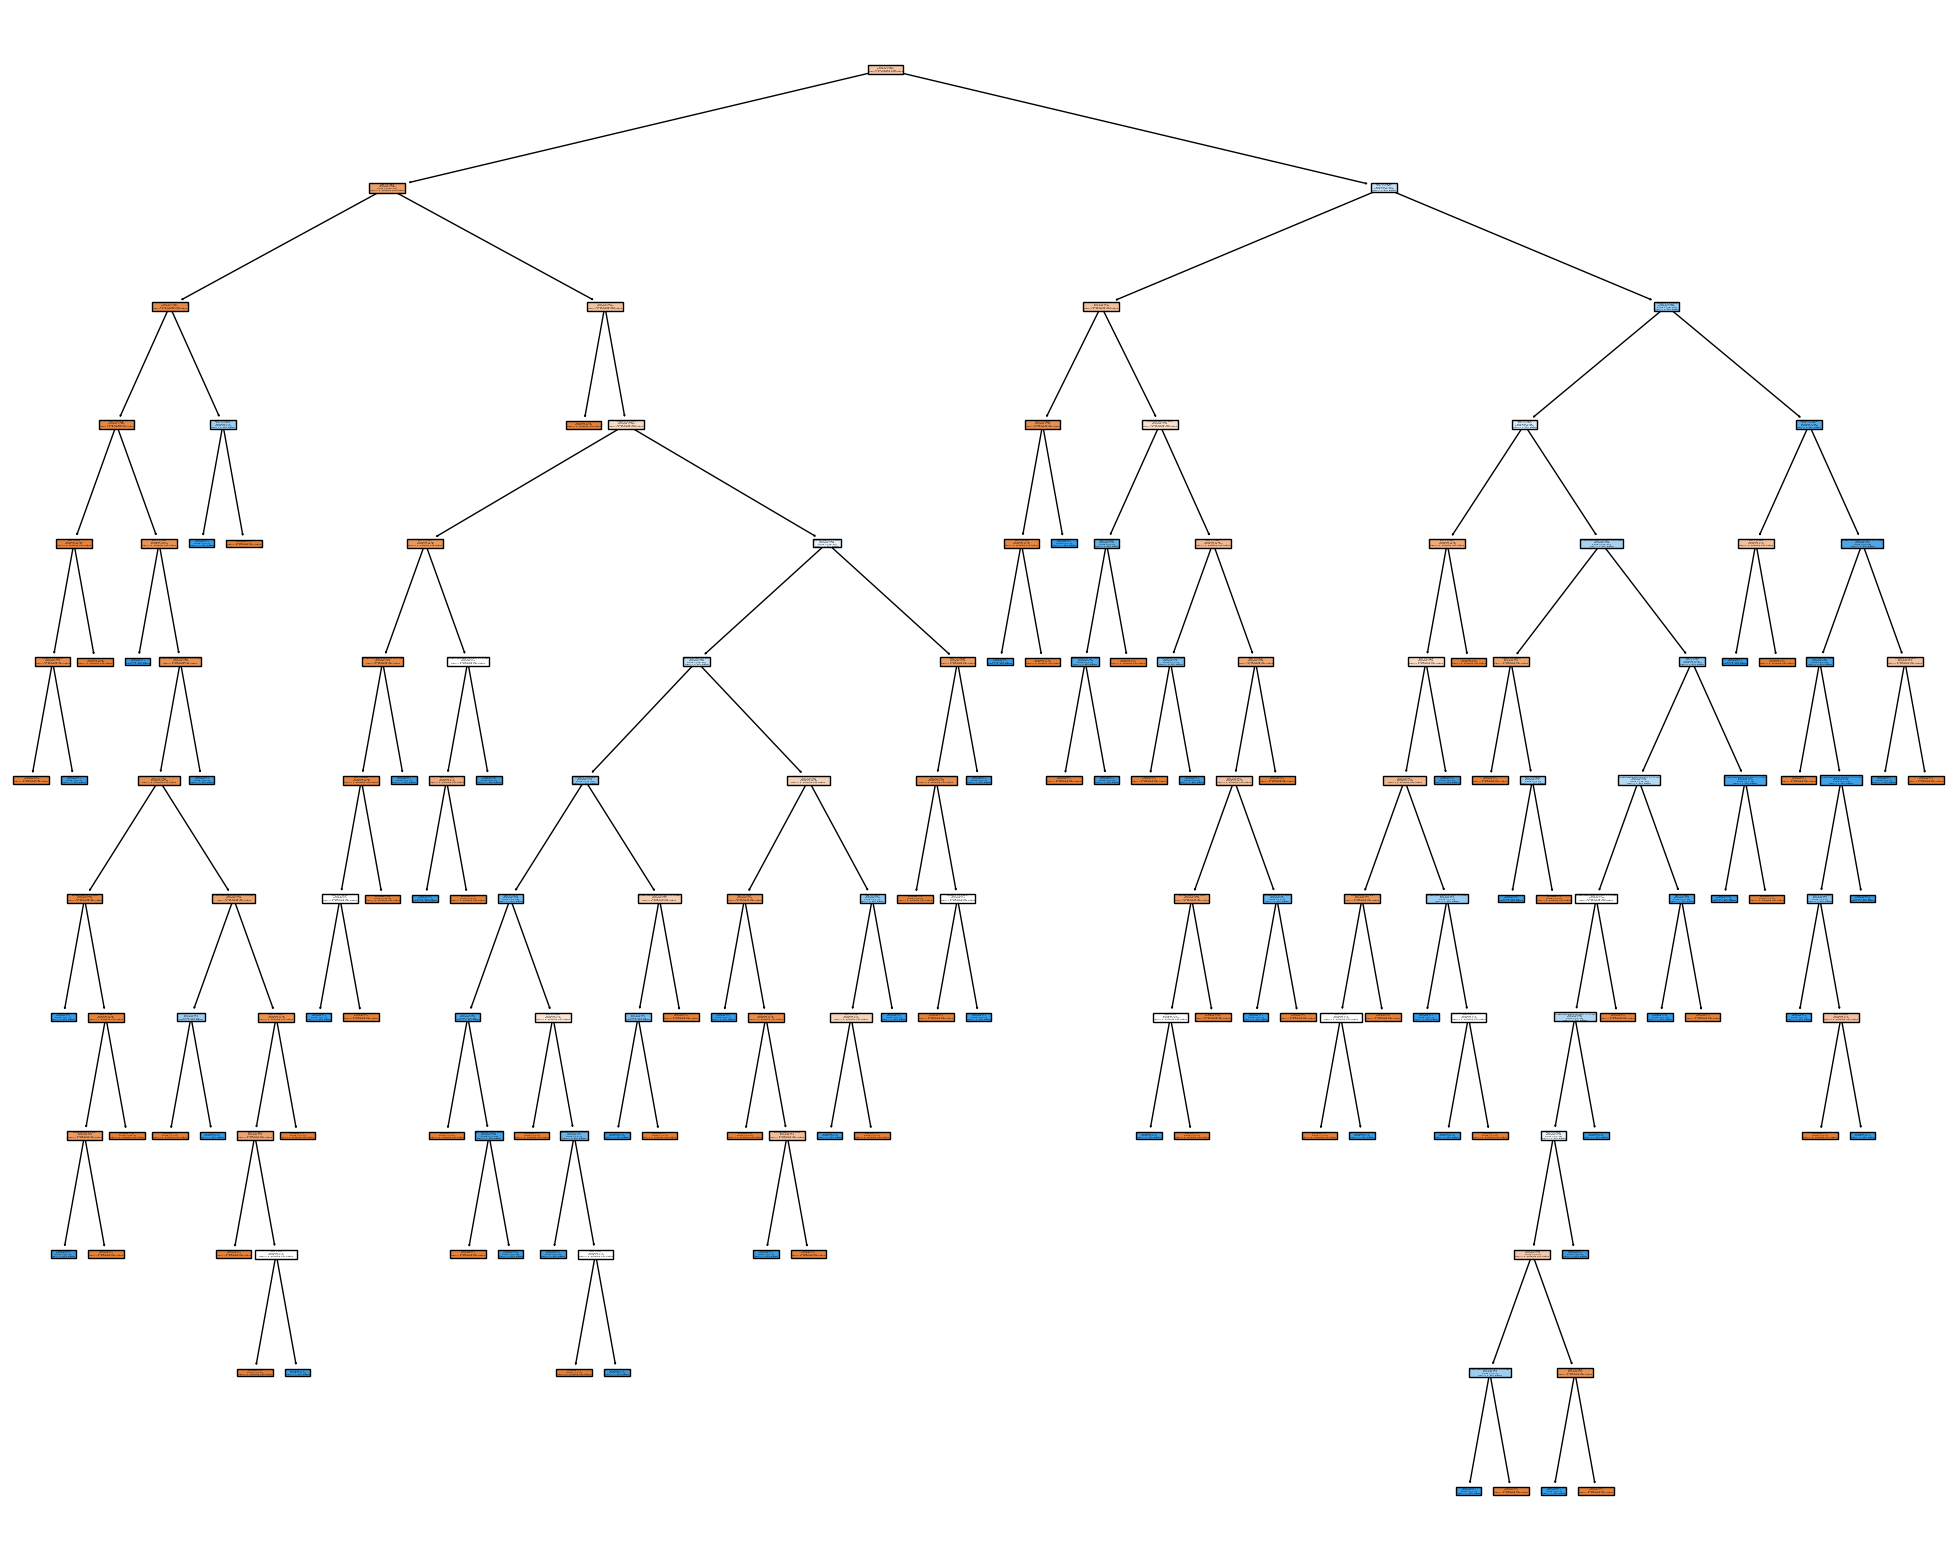

In [36]:
#b. hiển thị cây quyết định trên tập huấn luyện

from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))

tree.plot_tree(Tree_td,
              feature_names=feature_names,
              class_names=td_names,
              filled=True)

plt.show()

In [37]:
#c độ chính xác trên tập train - test
train = Tree_td.score(X_train, Y_train)
print('Độ chính xác trên tập huấn luyện: ', round(train*100, 2), '%')

Độ chính xác trên tập huấn luyện:  100.0 %


In [38]:
from sklearn.metrics import accuracy_score
Y_pred = Tree_td.predict(X_test)

acc = accuracy_score(Y_test, Y_pred, normalize=True)
print('Độ chính xác trên mô hình tập test: ', round(acc*100, 2), '%')

Độ chính xác trên mô hình tập test:  70.51 %


In [39]:
#Sử dụng mô hình Naive Bayes với TF-IDF
from sklearn import naive_bayes

#Khai báo sử dụng model Multinomial Naive bayes:
MultiNB = naive_bayes.MultinomialNB(alpha=0.75)

#huấn luyện mô hình với tập huấn luyện Train
MultiNB.fit(X_train,Y_train)

#Danh sách các tham số của model:
MultiNB.get_params()

{'alpha': 0.75, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

In [40]:
#Đánh giá độ chính xác của mô hình trên tập huấn luyện
acc_MultiNB = round(MultiNB.score(X_train, Y_train) * 100, 2)

print('Độ chính xác của mô hình trên tập huấn luyện: ', acc_MultiNB, '%')

Độ chính xác của mô hình trên tập huấn luyện:  63.04 %


In [41]:
from sklearn.metrics import accuracy_score
#Dự đoán và tính đoán độ chính xác của model trên tập Test:
y_pred = MultiNB.predict(X_test)

acc1 = round(accuracy_score(Y_test, y_pred)*100, 2)
print('1.Độ chính xác của mô hình trên tập Test: ', acc1, '%')

acc2 = accuracy_score(Y_test, y_pred, normalize=False)
print('2.Tổng số mẫu dự đoán đúng:', acc2, ' /', len(Y_test))
print('3.Tổng số mẫu dự đoán sai:', len(Y_test) - acc2, ' /', len(Y_test))

1.Độ chính xác của mô hình trên tập Test:  65.9 %
2.Tổng số mẫu dự đoán đúng: 143  / 217
3.Tổng số mẫu dự đoán sai: 74  / 217
